# 2.  Cluster the twitters into different topics 

In [3]:
import GetOldTweets3 as got
import pandas as pd
from functools import reduce
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk
import re
import numpy as np
%matplotlib inline

In [5]:
def tokens_clean(tokens):
    #tokens = add_up_words(f).lower()
    # remove urls 
    tokens = re.sub(r"http\S+", ' ', tokens)
    # remove symbols 
    tokens = re.sub(r'[^\w]', ' ', tokens)
    # remove numbers
    tokens = re.sub(r'\d', '', tokens)
    tokens = tokens.split()

    # clean stopwords
    from nltk.corpus import stopwords
    sr= stopwords.words('english')
    
    # of course we should avoid words like covid19, coronavirus
    sr += ['covid19','covid','coronavirus','covid-19','pandemic','amp',\
          'corona','virus']
    clean_tokens = tokens[:]
    for token in tokens:
        if token in sr:  
            clean_tokens.remove(token)
    return clean_tokens

In [6]:
def plot_frequency(clean_tokens,num):
    #plt.figure(figsize=[10,6])
    freq = nltk.FreqDist(clean_tokens)
    #for key,val in freq.items():
    #     print(str(key) + ':' + str(val)
    freq.plot(10, cumulative=False)
    return freq.most_common(num)

In [7]:
def plot_word_cloud(all_texts,ax):
    # all_texts must be a string 
    covid_wc = WordCloud(
        background_color='white',
        max_words=100
        )

    # generate the word cloud
    covid_wc.generate(all_texts)

    # display the word cloud
    ax.imshow(covid_wc, interpolation='bilinear')
    ax.axis('off')


In [8]:
f1 = pd.read_csv('COVID19-0k-2020tweets.csv',index_col=[0],parse_dates=[1])
f2 = pd.read_csv('coronavirus-0k-2020tweets.csv',index_col=[0],parse_dates=[1])
f = pd.concat([f1,f2], ignore_index=True)

In [9]:
clean_tokens = []
for tokens in f.Text:
    clean_tokens += [' '.join(tokens_clean(tokens.lower()))]
f['Clean_Text'] = clean_tokens

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score
vectorizer = TfidfVectorizer(max_features=10000,\
                                 stop_words='english',\
                                 use_idf=True, ngram_range=(1,3),)
X = vectorizer.fit_transform(f['Clean_Text'])

In [34]:
from sklearn.cluster import KMeans 
k_means = KMeans(init = "k-means++", n_clusters = 10, n_init = 12)
k_means.fit(X)

KMeans(n_clusters=10, n_init=12)

(array([ 2046., 22221.,   681.,  1443.,  1721.,  2220.,  1034.,  2412.,
          119.,  1516.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

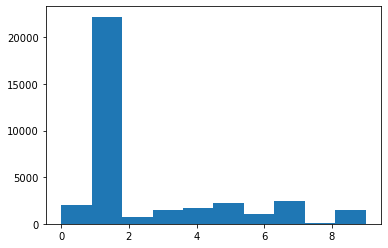

In [35]:
plt.hist(k_means.labels_)

In [36]:
f['K_means_label'] = k_means.labels_

## first topic: outbreak in China

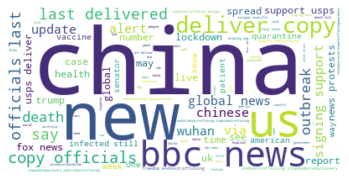

In [37]:
all_text = []
for t in f.Clean_Text.loc[f.K_means_label== 0]:
    all_text += t.split()
fig = plt.figure()
plot_word_cloud(' '.join(all_text),fig.gca())

## second topic: out break in the US

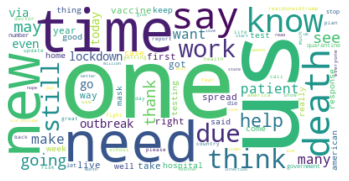

In [39]:
all_text = []
for t in f.Clean_Text.loc[f.K_means_label== 1]:
    all_text += t.split()
fig = plt.figure()
plot_word_cloud(' '.join(all_text),fig.gca())

## thrid topic: report of positive cases

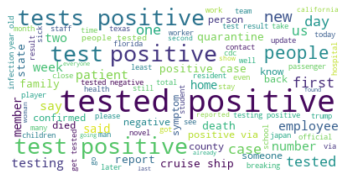

In [41]:
all_text = []
for t in f.Clean_Text.loc[f.K_means_label== 2]:
    all_text += t.split()
fig = plt.figure()
plot_word_cloud(' '.join(all_text),fig.gca())

##  cluster 4: no specific topics 

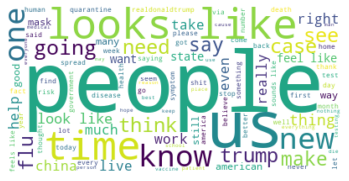

In [42]:
all_text = []
for t in f.Clean_Text.loc[f.K_means_label== 3]:
    all_text += t.split()
fig = plt.figure()
plot_word_cloud(' '.join(all_text),fig.gca())

## topic 4: confirmed cases 

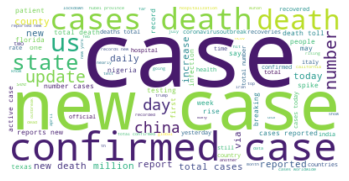

In [44]:
all_text = []
for t in f.Clean_Text.loc[f.K_means_label== 4]:
    all_text += t.split()
fig = plt.figure()
plot_word_cloud(' '.join(all_text),fig.gca())

## topic 5: politics

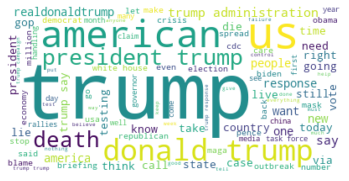

In [46]:
all_text = []
for t in f.Clean_Text.loc[f.K_means_label== 5]:
    all_text += t.split()
fig = plt.figure()
plot_word_cloud(' '.join(all_text),fig.gca())

## topic 6: cases around the world

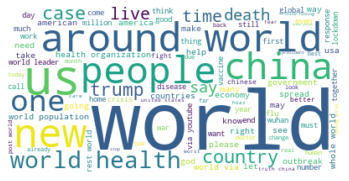

In [48]:
all_text = []
for t in f.Clean_Text.loc[f.K_means_label== 6]:
    all_text += t.split()
fig = plt.figure()
plot_word_cloud(' '.join(all_text),fig.gca())

## topic 7: to live or to die

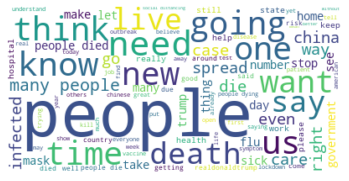

In [49]:
all_text = []
for t in f.Clean_Text.loc[f.K_means_label== 7]:
    all_text += t.split()
fig = plt.figure()
plot_word_cloud(' '.join(all_text),fig.gca())

## topic 8 report of death cases

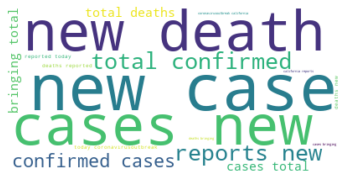

In [51]:
all_text = []
for t in f.Clean_Text.loc[f.K_means_label== 8]:
    all_text += t.split()
fig = plt.figure()
plot_word_cloud(' '.join(all_text),fig.gca())

## topic 9 crisis due to pandemic 

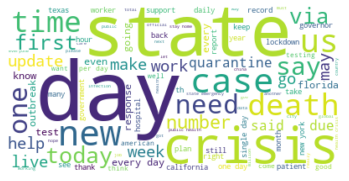

In [52]:
all_text = []
for t in f.Clean_Text.loc[f.K_means_label== 9]:
    all_text += t.split()
fig = plt.figure()
plot_word_cloud(' '.join(all_text),fig.gca())

## ... to be continued 